# Regular expressions 
## Load data

In [1]:
from datasets import load_dataset
import re
ds = load_dataset("clarin-knext/fiqa-pl", "corpus")

c:\Users\katar\miniconda3\envs\NLP\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Devise two regular expressions:
   * extracting times, e.g. recognizing `20:30` as an instance of a time.
   * extracting dates, e.g. recognizing `20 września` as an instance of a date.

In [2]:
time_regex = r'\b(?:0?[0-9]|1[0-9]|2[0-3]):[0-5][0-9](?::[0-5][0-9])?\b'

In [3]:
date_regex = r'\b(?:[1-9]|0[1-9]|[12][0-9]|3[01])[\./-](?:[1-9]|0[1-9]|1[0-2])[\./-](?:[1-2]\d{3})\b|' \
              r'\b(?:[1-2]\d{3})[\./-](?:[1-9]|0[1-9]|1[0-2])[\./-](?:[1-9]|0[1-9]|[12][0-9]|3[01])\b|' \
              r'\b(?:[1-9]|[12][0-9]|3[01]) (?:stycznia|lutego|marca|kwietnia|maja|czerwca|lipca|sierpnia|września|października|listopada|grudnia) (?:[1-2]\d{3})\b|' \
              r'\b(?:0[1-9]|1[0-2])[\./-](?:[1-2]\d{3})\b|' \
              r'\b(?:[1-2]\d{3})[\./-](?:0[1-9]|1[0-2])\b|' \
              r'\b(?:styczeń|luty|marzec|kwiecień|maj|czerwiec|lipiec|sierpień|wrzesień|październik|listopad|grudzień) (?:[1-2]\d{3})\b|' \
              r'\b(?:[1-9]|[12][0-9]|3[01]) (?:stycznia|lutego|marca|kwietnia|maja|czerwca|lipca|sierpnia|września|października|listopada|grudnia)\b'

Poniższe wyrażenie regularne uwzględniało również skrócony zapis dat w formatach D(D)/.-M(M), M(M)/.-D(D) oraz zapis roku w postaci YY dla wszystkich formatów, jednak po przeanalizowaniu kontekstu wystąpień tego typu form okzało się, że w większości przypadków nie dotyczą one dat, a np. ułamków (1/3) czy przedziałów 10-12, dlatego finalny regex nie uwzględnia tych formatów.

In [3]:
# date_regex = r'\b(?:[1-9]|0[1-9]|[12][0-9]|3[01])[\./-](?:[1-9]|0[1-9]|1[0-2])[\./-](?:\d{4}|\d{2})\b|' \
#               r'\b(?:\d{4}|\d{2})[\./-](?:[1-9]|0[1-9]|1[0-2])[\./-](?:[1-9]|0[1-9]|[12][0-9]|3[01])\b|' \
#               r'\b(?:[1-9]|0[1-9]|[12][0-9]|3[01]) (?:stycznia|lutego|marca|kwietnia|maja|czerwca|lipca|sierpnia|września|października|listopada|grudnia) (?:\d{4}|\d{2})\b|' \
#               r'\b(?:[1-9]|0[1-9]|[12][0-9]|3[01])[\./-](?:[1-9]|0[1-9]|1[0-2])\b|' \
#               r'\b(?:[1-9]|0[1-9]|1[0-2])[\./-](?:[1-9]|0[1-9]|[12][0-9]|3[01])\b|' \
#               r'\b(?:[1-9]|0[1-9]|1[0-2])[\./-](?:\d{4}|\d{2})\b|' \
#               r'\b(?:\d{4}|\d{2})[\./-](?:[1-9]|0[1-9]|1[0-2])\b|' \
#               r'\b(?:styczeń|luty|marzec|kwiecień|maj|czerwiec|lipiec|sierpień|wrzesień|październik|listopad|grudzień) (?:\d{4}|\d{2})\b|' \
#               r'\b(?:[1-9]|0[1-9]|[12][0-9]|3[01]) (?:stycznia|lutego|marca|kwietnia|maja|czerwca|lipca|sierpnia|września|października|listopada|grudnia)\b'

## 2. Search for occurrences of times and dates in the dataset.
### Times occurences

In [4]:
texts_with_time = ds['corpus'].filter(lambda row: re.search(time_regex, row['text']))
texts_with_time = texts_with_time.map(lambda row: {'times': re.findall(time_regex, row['text'])})

In [5]:
texts_with_time['times'][1:10]

[['6:17'],
 ['20:00', '17:00'],
 ['22:00'],
 ['12:00'],
 ['17:30:33'],
 ['15:00'],
 ['5:35'],
 ['8:00', '20:00'],
 ['12:03']]

In [6]:
def count_occurences(data, column):
    all_accurences = []
    for row in data:
        all_accurences.extend(row[column])
    return len(all_accurences)

In [7]:
print(f"Numer of all times occurnces: {count_occurences(texts_with_time, 'times')}")

Numer of all times occurnces: 448


### Dates occurences

In [8]:
texts_with_dates = ds['corpus'].filter(lambda row: re.search(date_regex, row['text']))
texts_with_dates = texts_with_dates.map(lambda row: {'date': re.findall(date_regex, row['text'])})

In [9]:
print(f"Numer of dates occurnces: {count_occurences(texts_with_dates, 'date')}")

Numer of dates occurnces: 2859


In [60]:
texts_with_dates['date'][1:10]

[['2014/08'],
 ['2017-10-06', '2017-10-06'],
 ['2 kwietnia 2018', '30 kwietnia 2018'],
 ['2017/01', '2017/02', '2017/09/09', '2009/07/09'],
 ['1 grudnia', '1 grudnia'],
 ['2017/01/02'],
 ['4 maja 1972',
  '2 marca 1975',
  '18 lipca 1979',
  '23 czerwca 1981',
  '17 października 1980',
  '15 lutego 1983',
  '18 grudnia 1980',
  '6 września 1983',
  '16 września 1982',
  '28 lutego 1984',
  '29 września 1982',
  '4 grudnia 1984',
  '7 marca 1983',
  '11 grudnia 1984',
  '5 października 1984',
  '18 marca 1986',
  '9 stycznia 1985',
  '8 lipca 1986',
  '7 marca 1985',
  '22 lipca 1986',
  '25 października 1984',
  '22 lipca 1986',
  '2 listopada 1984',
  '20 października 1987',
  '16 kwietnia 1985',
  '29 grudnia 1987',
  '29 grudnia 1986',
  '8 listopada 1988',
  '27 maja 1986',
  '29 listopada 1988',
  '8 czerwca 1987',
  '12 września 1989',
  '25 stycznia 1989',
  '8 maja 1990',
  '19 stycznia 1988',
  '30 października 1990',
  '5 lutego 1993',
  '18 stycznia 1994',
  '25 kwietnia 199

## 3. Plot results from point 2:
   * for times create a bar plot for full hours.
   * for dates create a bar plot for months.

### Full hours occurences

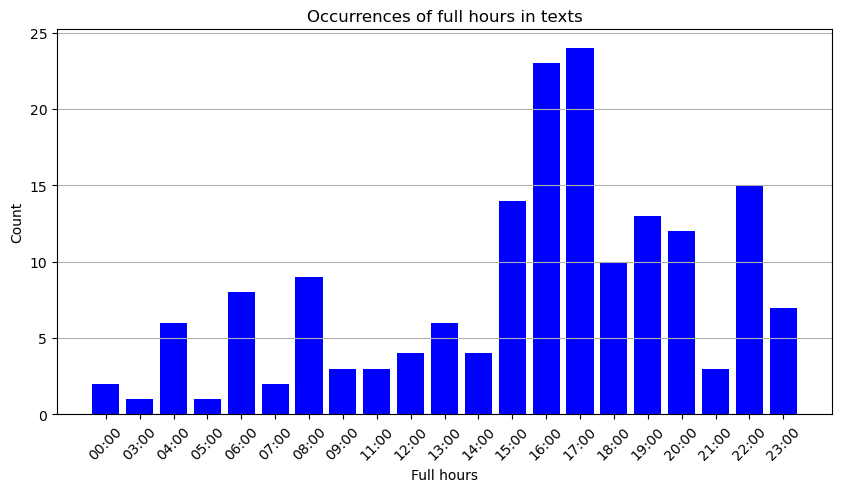

In [14]:
from collections import Counter
import matplotlib.pyplot as plt
full_hour_regex = r'\b(?:[0-1]?[0-9]|2[0-3]):00\b(?!:)'

full_hours = []
for row in texts_with_time:
    times = row['times']
    for time in times:
        match = re.match(full_hour_regex, time)
        if match:
            formatted_time = time.zfill(5)
            full_hours.append(formatted_time)

hour_counts = Counter(full_hours)
sorted_hours = sorted(hour_counts.items(), key=lambda x: x[0])
hour_labels = [hour for hour, count in sorted_hours]
hour_values = [count for hour, count in sorted_hours]

plt.figure(figsize=(10, 5))
plt.bar(hour_labels, hour_values, color='blue')
plt.xlabel('Full hours')
plt.ylabel('Count')
plt.title('Occurrences of full hours in texts')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

### Months occurences

In [10]:
months_map = {
    "stycznia": "01", "lutego": "02", "marca": "03", "kwietnia": "04",
    "maja": "05", "czerwca": "06", "lipca": "07", "sierpnia": "08",
    "września": "09", "października": "10", "listopada": "11", "grudnia": "12",
    "styczeń": "01", "luty": "02", "marzec": "03", "kwiecień": "04",
    "maj": "05", "czerwiec": "06", "lipiec": "07", "sierpień": "08",
    "wrzesień": "09", "październik": "10", "listopad": "11", "grudzień": "12"
}


In [11]:
def extract_month(date):
    # dla miesiecy zapisanych slownie
    for key, month in months_map.items():
        if key in date.lower():
            return month

    date_parts = re.split(r'[.\-\/]', date)
    
    # daty w pelnym formacie liczbowym (np. 10.10.2022)
    if len(date_parts) == 3:
        return date_parts[1].zfill(2)  
    # daty w skroconym formacie liczbowym (MM-/.YYYY lub YYYY-/.MM)
    elif len(date_parts) == 2:
        if len(date_parts[0]) == 2:
            return date_parts[0].zfill(2)
        elif len(date_parts[1]) == 2:
            return date_parts[1].zfill(2)
  
    return None

In [12]:
reverse_months_map = {
    "01": "styczeń", "02": "luty", "03": "marzec", "04": "kwiecień",
    "05": "maj", "06": "czerwiec", "07": "lipiec", "08": "sierpień",
    "09": "wrzesień", "10": "październik", "11": "listopad", "12": "grudzień"
}

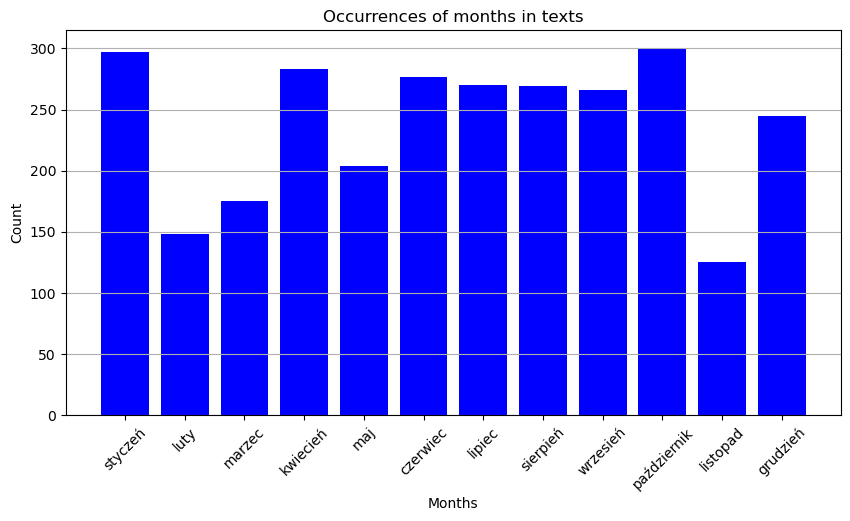

In [15]:
months = []
for row in texts_with_dates:
    dates = row['date']
    for date in dates:
        normalized_month = extract_month(date)
        if normalized_month:
            months.append(normalized_month)

month_counts = Counter(months)

sorted_months = sorted(month_counts.items(), key=lambda x: x[0])
month_labels = [reverse_months_map[month] for month, count in sorted_months] 
month_values = [count for month, count in sorted_months]

plt.figure(figsize=(10, 5))
plt.bar(month_labels, month_values, color='blue')
plt.xlabel('Months')
plt.ylabel('Count')
plt.title('Occurrences of months in texts')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

## 4. Compute the number of occurrences of `kwiecień` word in any inflectional form. Use a compact form for the query (i.e. joining all forms of the word by alternative is forbidden).

In [18]:
kwiecien_regex = r'\b[kK]wiecień|[kK]wietni(?:a|owi|em|u|e|ów|om|ami|ach)\b'

In [34]:
texts_with_kwiecien = ds['corpus'].filter(lambda row: re.search(kwiecien_regex, row['text'])) \
                                  .map(lambda row: {'kwiecien': re.findall(kwiecien_regex, row['text'])})
kwiecien_all = []
for row in texts_with_kwiecien:
    kwiecien_occurences = row['kwiecien']
    kwiecien_all.extend(kwiecien_occurences)
len(kwiecien_all) 

352

## 5. As in 4, but preceded by a number and a space.

In [35]:
kwiecien_number_space_regex = r'(?<=\d\s)\b([kK]wiecień|[kK]wietni(?:a|owi|em|u|e|ów|om|ami|ach))\b'

In [38]:
texts_with_kwiecien_1 = ds['corpus'].filter(lambda row: re.search(kwiecien_number_space_regex, row['text'])) \
                                    .map(lambda row: {'kwiecien preceded by number and space': re.findall(kwiecien_number_space_regex, row['text'])})
kwiecien_number_space = []
for row in texts_with_kwiecien_1:
    kwiecien_occurences = row['kwiecien preceded by number and space']
    kwiecien_number_space.extend(kwiecien_occurences)
len(kwiecien_number_space) 

201

## 6. As in 4, but not preceded by a number and a space. Check if the results from 5 and 6 sum to 4.

In [50]:
kwiecien_without_number_space_regex = r'(?<!\d\s)\b([kK]wiecień|[kK]wietni(?:a|owi|em|u|e|ów|om|ami|ach))\b'

In [44]:
texts_with_kwiecien_2 = ds['corpus'].filter(lambda row: re.search(kwiecien_without_number_space_regex, row['text'])) \
                                    .map(lambda row: {'kwiecien not preceded by number and space': re.findall(kwiecien_without_number_space_regex, row['text'])})
kwiecien_wiyhout_number_space = []
for row in texts_with_kwiecien_2:
    kwiecien_occurences = row['kwiecien not preceded by number and space']
    kwiecien_wiyhout_number_space.extend(kwiecien_occurences)
len(kwiecien_wiyhout_number_space) 

Map: 100%|██████████| 128/128 [00:00<00:00, 1590.32 examples/s]


151

Suma rezultatów z zadnia 5 i 6 jest równa rezultatowi z zadania 4.

## 7. Ask an LLM (e.g. Bielik) to complete these tasks for you. Compare and criticize the code generated by the LLM.

**Prompt:**
napisz wyrażenie regularne w Pythonie do rozpoznawania godzin w tekście, takich jak np. "20:30"

In [2]:
import re

# Definicja wyrażenia regularnego
pattern = r'\b(?:0?[0-9]|1[0-9]|2[0-3]):[0-5][0-9]\b'

# Funkcja do wyszukiwania godzin w tekście
def find_hours(text):
    matches = re.findall(pattern, text)
    return matches

Wyrażenie wygenerowane przez model Bielik jest bardzo podobne do tego użytego przeze mnie. Jedyna różnica polega na tym, że moje wyrażenie uwzględnia również sekundy, jeżeli pojawiają się w zapisie czasu. Model nie uwzględnił sekund prawdopodobnie dlatego, że zasugerował się podanym w prompcie przykładem.

**Prompt:** napisz wyrażenie regularne do rozpoznawania dat w tekście 

In [ ]:
import re

# Wyrażenie regularne do rozpoznawania dat
pattern = r'\b(?:0?[1-9]|[12][0-9]|3[01])\b(?:/|-|\.)\b(?:0?[1-9]|[12][0-9]|3[01])\b(?:/|-|\.)\b(?:19|20)\d{2}\b'

# Funkcja do wyszukiwania dat w tekście
def find_dates(text):
    matches = re.findall(pattern, text)
    return matches

W tym wypadku nie podałam w prompcie przykładowej daty, która pojawiłą się w poleceniu (20 września) i model nie uwzględnił formatu daty z miesiącem zapisanym słownnie. Poza tym model nie uwzględnił też formatu YYYY/MM/DD czy jego skróconej formy YYYY/MM. W przypadku zapisu roku model ograniczył się do dat z przedziału 1900-2099. W większści przypadków ma to sens, jednak gdybyśmy mieli do czynienia np. z tekstami historycznymi, takie ograniczenie powodowałoby utratę informacji.

**Prompt:** znajdź wystąpienia czasu i dat w zbiorze danych ds = load_dataset("clarin-knext/fiqa-pl", "corpus")

In [30]:
import spacy
import pandas as pd

# Załaduj zbiór danych
nlp = spacy.load("clarin-knext/fiqa-pl")

# Załaduj dane do DataFrame
ds = pd.read_csv("clarin-knext/fiqa-pl/corpus.csv", encoding="utf-8")

import re

def find_times(text):
    pattern = r'\b(?:0?[0-9]|1[0-9]|2[0-3]):[0-5][0-9]\b'
    return re.findall(pattern, text)

def find_dates(text):
    pattern = r'\b(?:0?[1-9]|[12][0-9]|3[01])\b(?:/|-|\.)\b(?:0?[1-9]|[12][0-9]|3[01])\b(?:/|-|\.)\b(?:19|20)\d{2}\b'
    return re.findall(pattern, text)

# Dodaj kolumny dla czasu i dat
ds["times"] = ds["text"].apply(find_times)
ds["dates"] = ds["text"].apply(find_dates)

print(ds[["text", "times", "dates"]].head())

# Zlicz wystąpienia czasu i dat
times_count = ds["times"].str.len().sum()
dates_count = ds["dates"].str.len().sum()

print(f"Całkowita liczba znalezionych czasów: {times_count}")
print(f"Całkowita liczba znalezionych dat: {dates_count}")



OSError: [E050] Can't find model 'clarin-knext/fiqa-pl'. It doesn't seem to be a Python package or a valid path to a data directory.

Model niepotrzebnie próbuje załadować zbiór danych za pomocą biblioteki spacy, co generuje błąd.

**Prompt:** nie używaj biblioteki spacy. Załaduj dane w ten sposób: 

from datasets import load_dataset 

ds = load_dataset("clarin-knext/fiqa-pl", "corpus")

In [31]:
from datasets import load_dataset
import re

# Załaduj dane
ds = load_dataset("clarin-knext/fiqa-pl", "corpus")

# Funkcja do wyszukiwania czasu
def find_times(text):
    pattern = r'\b(?:0?[0-9]|1[0-9]|2[0-3]):[0-5][0-9]\b'
    return re.findall(pattern, text)

# Funkcja do wyszukiwania dat
def find_dates(text):
    pattern = r'\b(?:0?[1-9]|[12][0-9]|3[01])\b(?:/|-|\.)\b(?:0?[1-9]|[12][0-9]|3[01])\b(?:/|-|\.)\b(?:19|20)\d{2}\b'
    return re.findall(pattern, text)

# Dodaj kolumny dla czasu i dat
ds = ds.map(lambda example: {**example, "times": find_times(example["text"]), "dates": find_dates(example["text"])})

# Wyświetl pierwsze 5 przykładów z czasem i datą
print(ds[:5])

# Zlicz wystąpienia czasu i dat
times_count = sum(len(example["times"]) for example in ds)
dates_count = sum(len(example["dates"]) for example in ds)

print(f"Całkowita liczba znalezionych czasów: {times_count}")
print(f"Całkowita liczba znalezionych dat: {dates_count}")

Map: 100%|██████████| 57638/57638 [00:08<00:00, 6467.07 examples/s]


KeyError: "Invalid key: slice(None, 5, None). Please first select a split. For example: `my_dataset_dictionary['corpus'][slice(None, 5, None)]`. Available splits: ['corpus']"

W tym wpadku ponownie pojawia się błąd związany z niepoprawnym odwoływaniem się do danych. Powinniśmy odwoływać się do ds['corpus']. Po wprowadzeniu tej zmiany kod działa poprawnie.

In [36]:
from datasets import load_dataset
import re

# Załaduj dane
ds = load_dataset("clarin-knext/fiqa-pl", "corpus")

# Funkcja do wyszukiwania czasu
def find_times(text):
    pattern = r'\b(?:0?[0-9]|1[0-9]|2[0-3]):[0-5][0-9]\b'
    return re.findall(pattern, text)

# Funkcja do wyszukiwania dat
def find_dates(text):
    pattern = r'\b(?:0?[1-9]|[12][0-9]|3[01])\b(?:/|-|\.)\b(?:0?[1-9]|1[0-2])\b(?:/|-|\.)\b(?:19|20)\d{2}\b'
    return re.findall(pattern, text)

# Dodaj kolumny dla czasu i dat
ds['corpus'] = ds['corpus'].map(lambda example: {**example, "times": find_times(example["text"]), "dates": find_dates(example["text"])})

# Wyświetl pierwsze 5 przykładów z czasem i datą
print(ds['corpus'][:5])

# Zlicz wystąpienia czasu i dat
times_count = sum(len(example["times"]) for example in ds['corpus'])
dates_count = sum(len(example["dates"]) for example in ds['corpus'])

print(f"Całkowita liczba znalezionych czasów: {times_count}")
print(f"Całkowita liczba znalezionych dat: {dates_count}")


{'_id': ['3', '31', '56', '59', '63'], 'title': ['', '', '', '', ''], 'text': ['Nie mówię, że nie podoba mi się też pomysł szkolenia w miejscu pracy, ale nie możesz oczekiwać, że firma to zrobi. Szkolenie pracowników to nie ich praca – oni tworzą oprogramowanie. Być może systemy edukacyjne w Stanach Zjednoczonych (lub ich studenci) powinny trochę martwić się o zdobycie umiejętności rynkowych w zamian za ich ogromne inwestycje w edukację, zamiast wychodzić z tysiącami zadłużonych studentów i narzekać, że nie są do niczego wykwalifikowani.', 'Tak więc nic nie zapobiega fałszywym ocenom poza dodatkową kontrolą ze strony rynku/inwestorów, ale istnieją pewne nowsze kontrole, które uniemożliwiają instytucjom korzystanie z nich. W ramach DFA banki nie mogą już polegać wyłącznie na ratingach kredytowych jako należytej staranności przy zakupie instrumentu finansowego, więc to jest plus. Intencją jest to, że jeśli instytucje finansowe wykonują swoją własną pracę, to *być może* dojdą do wniosku, 

**Prompt:** Przedstaw wyniki na wykresach. Dla czasu stwórz wykres dla pełnych godzin. Dla dat stwórz wykres z podziałem na miesiące.

In [39]:
import matplotlib.pyplot as plt

# Zlicz wystąpienia czasu w pełnych godzinach
times_by_hour = {}
for example in ds["corpus"]:
    for time in example["times"]:
        hour = int(time.split(":")[0])
        times_by_hour[hour] = times_by_hour.get(hour, 0) + 1

# Zlicz wystąpienia dat w miesiącach
dates_by_month = {}
for example in ds["corpus"]:
    for date in example["dates"]:
        year, month, day = date.split("/")
        year = int(year)
        month = int(month)
        dates_by_month[f"{year}-{month}"] = dates_by_month.get(f"{year}-{month}", 0) + 1

# Wykres czasu w pełnych godzinach
plt.figure(figsize=(10, 6))
plt.bar(range(24), times_by_hour.values(), tick_label=range(24))
plt.title("Wystąpienia czasu w pełnych godzinach")
plt.xlabel("Godzina")
plt.ylabel("Liczba wystąpień")
plt.xticks(rotation=45)
plt.show()

# Wykres dat w miesiącach
plt.figure(figsize=(10, 6))
plt.bar(dates_by_month.keys(), dates_by_month.values())
plt.title("Wystąpienia dat w miesiącach")
plt.xlabel("Miesiąc")
plt.ylabel("Liczba wystąpień")
plt.xticks(rotation=45)
plt.show()

ValueError: not enough values to unpack (expected 3, got 1)

Model generuje niepoprawny kod do zliczania miesięcy, ponieważ zakłada, że separatorem jest zawsze "/", a wcześniej wygenerowł regex dopuszczający również "." i "-" jako separatory.

**Prompt:** Zlicz wystąpienia wyrazu "kwiecień" w tekstach we wszystkich formach fleksyjnych. Użyj zwięzłej formy zapytania (tzn. łączenie wszystkich form wyrazu przez alternatywę jest zabronione). 

In [ ]:
import re

# Wyrażenie regularne do wyszukiwania wszystkich form wyrazu "kwiecień"
pattern = r'\b(?:kwiecien|kwietnia|kwiecienia|kwieciem|kwiecienie|kwiecieniu|kwiecieniem|kwiecieniemu|kwiecieniu|kwiecieniem)\b'

# Przykładowy tekst do przeszukania
text = "W kwietniu kwitną kwiaty, a w kwietniu pachnie wiosną."

# Zlicz wystąpienia wyrazu "kwiecień" we wszystkich formach
count = len(re.findall(pattern, text))

print(f"Liczba wystąpień wyrazu 'kwiecień' we wszystkich formach fleksyjnych: {count}")

Model uwzględnił niepoprawne formy wyrazu kwiecień, poza tym nie zastosował się do zastrzeżenia, aby nie tworzyć wyrażenia na zasadzie alternatywy wszystkich form.

**Prompt:** zlicz wystąpienia wyrazu kwiecień we wszystkich formach poprzedzonego liczbą i spacją

In [48]:
import re

# Wyrażenie regularne do wyszukiwania wszystkich form wyrazu "kwiecień" poprzedzonego liczbą i spacją
pattern = r'\b\d+\s+(?:kwiecien|kwietnia|kwiecienia|kwieciem|kwiecienie|kwiecieniu|kwiecieniem|kwiecieniemu|kwiecieniu|kwiecieniem)\b'

# Przykładowy tekst do przeszukania
text = "W 2023 roku w kwietniu kwitną kwiaty, a w 2024 roku w kwietniu pachnie wiosną."

# Zlicz wystąpienia wszystkich form wyrazu "kwiecień" poprzedzonego liczbą i spacją
count = len(re.findall(pattern, text))

print(f"Liczba wystąpień wszystkich form wyrazu 'kwiecień' poprzedzonego liczbą i spacją: {count}")

Liczba wystąpień wszystkich form wyrazu 'kwiecień' poprzedzonego liczbą i spacją: 0


Model twierdzi, że w podanym przez niego przykładzie zostaną zliczone dwa wystąpienia wyrazu kwiecień, podczas gdy żadne z nich nie spełnia warunku określonego w regexie. Model poprawnie odmienia wyraz kwiecień w zdaniu, jednak w wyrażeniu regularnym nadal stosuje niepoprawne formy. 

**Prompt:** zlicz wystąpienia wyrazu kwiecień we wszystkich formach, które nie są poprzedzone liczbą i spacją

In [49]:
import re

# Wyrażenie regularne do wyszukiwania wszystkich form wyrazu "kwiecień" niepoprzedzonych liczbą i spacją
pattern = r'(?<!\b\d+\s+)(?:kwiecien|kwietnia|kwiecienia|kwieciem|kwiecienie|kwiecieniu|kwiecieniem|kwiecieniemu|kwiecieniu|kwiecieniem)'

# Przykładowy tekst do przeszukania
text = "W 2023 roku w kwietniu kwitną kwiaty, a w kwietniu pachnie wiosną."

# Zlicz wystąpienia wszystkich form wyrazu "kwiecień" niepoprzedzonych liczbą i spacją
count = len(re.findall(pattern, text))

print(f"Liczba wystąpień wszystkich form wyrazu 'kwiecień' niepoprzedzonych liczbą i spacją: {count}")

error: look-behind requires fixed-width pattern

Model zgodnie z oczekiwaniami używa operatora negative lookbehind, jednak problem polega natym, że operator ten wymaga wzorca o stałej szerokości, a b\d+\s+ nie ma stałej szerokości, ponieważ liczba \d+ może mieć dowolną liczbę cyfr.

## Answer the following questions:
### 1. Are regular expressions good at capturing times?
Wyrażenie regularne wydają się dobrym rozwiązaniem do wyłapywania czasu w tekście ze wzgędu na to, że zapis czasu zwykle występuje w ustrukturyzowanej formie, mimo że mogą występować pewne różnice, jak np. 9:15 i 09:15, to nadal da się to w stosunkowo ławy sposób przedstawić za pomocą wyrażenia regularnego.

### 2. Are regular expressions good at capturing dates?
Ekstrakcja dat za pomocą wyrażeń regularnych jest trudniejsza niż w przypadku czasu, ponieważ zapis dat jest znacznie bardziej różnorodny, poza różnymi formatami liczbowymi występują też zapisy słowne (miesiąca lub niekiedy całej daty), w których w przypadku języka polskiego konieczne jest uwzględnienie różnych form fleksyjnych. Poza tym często pojawiają się formy skrócone zapisu dat, np. miesiąc + rok, dzień + miesiąc, które w przypadku zapisu liczbowego i bez dodatkowego kontekstu mogą być trudne do odróżnienia, np. zapis 1/2 może oznaczać połowę (i tak będzie najczęściej), ale też pierwszy lutego. 

### 3. How one can be sure that the expression has matched all and only the correct expressions of a given type?
Jeśli operujemy na bardzo długich tekstach dokładna weryfikacja może być trudna. Warto przyjrzeć się otrzymywanym rezultatom, tzn. jednostkom wyłapanym przez nasze wyrażenie regularne i jeśli któreś z nich budzą nasze wątpliwości, to warto wyszukać ich wystą pienia w tekście, aby zobaczyć, w jakim kontekście się pojawiły. Taka weryfikacja może pomóc w zidentyfikowaniu braków w naszym wyrażeniu. Poza tym warto też testować wyrażenia regularne na mniejszych fragmentach tekstu. Można wówczas w takich fragmentch umieścić przykłady weryfkujące poprawność wyrażenia regularnego.

### 4. Is LLM able to generate regular expressions?


Modele językowe są zdolne do generowania wyrażeńr egularnych. W prostych przykładach (takich jak rozpoznawanie godzin) radzą sobie z tym całkiem dobrze, jednak w bardziej złożonych przypakach popełniają dużo błędów i uzyskanie prawidłowego wzroca wymagałoby prawdopodobnie przekaznia w prompcie większej ilości szczegółów i wskazówek oraz dłuższej konwersacji, aby informować model o popełnianych przez niego błędach i żądać poprawy w kolejnych promptach.